# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [ ]:
#copied previous lab, at the bottom you'll find the answers to lab Customer Analysis Round 3

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv")
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
from dataframe_cleaning import lower_name_columns
lower_name_columns(df)


In [6]:
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [7]:
from dataframe_cleaning import rename_columns
rename_columns(df, {'customer lifetime value' : 'customer_lifetime_value',
                                    'effective to date':'effective_to_date',
                                    'employmentstatus':'employment_status',
                                    'location code':'location_code', 'marital status':'marital_status',
                                    'monthly premium auto':'monthly_premium_auto',
                                    'months since last claim':'months_since_last_claim',
                                    'months since policy inception':'months_since_policy_inception',
                                    'number of open complaints':'number_of_open_complaints',
                                    'number of policies':'number_of_policies', 'policy type':'policy_type',
                                    'renew offer type':'renew_offer_type', 'sales channel':'sales_channel',
                                    'total claim amount':'total_claim_amount','vehicle class':'vehicle_class',
                                    'vehicle size':'vehicle_size', 'vehicle type':'vehicle_type'})
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [8]:
from dataframe_cleaning import unique_values_columns
unique_values_columns(df)

['DK49336' 'KX64629' 'LZ68649' ... 'KX53892' 'TL39050' 'WA60547']
['Arizona' 'California' 'Washington' 'Oregon' nan 'Nevada']
[ 4809.21696   2228.525238 14947.9173   ...  5259.444853 23893.3041
 11971.97765 ]
['No' 'Yes' nan]
['Basic' 'Extended' 'Premium']
['College' 'Bachelor' 'High School or Below' 'Doctor' 'Master']
['2/18/11' '1/18/11' '2/10/11' '1/11/11' '1/17/11' '2/14/11' '2/24/11'
 '1/19/11' '1/4/11' '1/2/11' '2/7/11' '1/31/11' '1/26/11' '2/28/11'
 '1/16/11' '2/26/11' '2/23/11' '1/15/11' '2/2/11' '2/15/11' '1/24/11'
 '2/21/11' '2/22/11' '1/7/11' '1/28/11' '2/8/11' '2/12/11' '2/20/11'
 '1/5/11' '2/19/11' '1/3/11' '2/3/11' '1/22/11' '1/23/11' '2/5/11'
 '2/13/11' '1/25/11' '2/16/11' '2/1/11' '1/27/11' '1/12/11' '1/20/11'
 '2/6/11' '2/11/11' '1/21/11' '1/29/11' '1/9/11' '2/9/11' '2/27/11'
 '1/1/11' '2/17/11' '2/25/11' '1/13/11' '1/6/11' '2/4/11' '1/14/11'
 '1/10/11' '1/8/11' '1/30/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['M' 'F']
[48029     0 22139 ... 6

In [9]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [10]:
#display(df[df['state'].isna() == True])
print(df['state'].value_counts())
print('This is the % of customers from California:', round(3552*100/10279, 2))
print('This is the % of customers from Oregon:', round(2909*100/10279, 2))
print('This is the % of customers from Arizona:', round(1937*100/10279, 2))
print('This is the % of customers from Nevada:', round(993*100/10279, 2))
print('This is the % of customers from Washington:', round(888*100/10279, 2))

state
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64
This is the % of customers from California: 34.56
This is the % of customers from Oregon: 28.3
This is the % of customers from Arizona: 18.84
This is the % of customers from Nevada: 9.66
This is the % of customers from Washington: 8.64


In [11]:
nan_values_state = df[(df['state'].isna() == True)].index.tolist()

df.iloc[nan_values_state[:218], list(df).index("state")] = "California"
df.iloc[nan_values_state[218:396], list(df).index("state")] = "Oregon"
df.iloc[nan_values_state[396:515], list(df).index("state")] = "Arizona"
df.iloc[nan_values_state[515:575], list(df).index("state")] = "Nevada"
df.iloc[nan_values_state[575:], list(df).index("state")] = "Washington"

df['state'].isna().sum()

0

In [12]:
#display(df[df['response'].isna() == True])
nan_values_response = df[(df['response'].isna() == True)].index.tolist()
df.iloc[nan_values_response[:], list(df).index("response")] = "Undetermined"
df['response'].isna().sum()

0

In [13]:
#display(df[df['months_since_last_claim'].isna() == True])
df[pd.isnull(df['months_since_last_claim']) & (df['total_claim_amount'])] 


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
23,NQ71171,California,5107.071054,No,Basic,Bachelor,2/2/11,Employed,M,70174,...,NaN,7,Personal Auto,Personal L2,Offer1,Agent,128.900320,Four-Door Car,Medsize,NaN
51,FT56968,Arizona,2590.096027,No,Basic,High School or Below,1/3/11,Employed,M,22398,...,NaN,1,Personal Auto,Personal L1,Offer1,Agent,321.600000,Four-Door Car,Large,A
59,EP83939,Arizona,5575.751228,No,Basic,High School or Below,1/26/11,Employed,M,91416,...,NaN,5,Personal Auto,Personal L3,Offer2,Call Center,109.904496,Four-Door Car,Medsize,NaN
67,KR35099,Washington,7507.455372,Yes,Basic,College,2/6/11,Employed,M,60920,...,NaN,2,Personal Auto,Personal L3,Offer2,Agent,231.201886,Two-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,AP56340,Washington,5384.671725,No,Basic,Bachelor,2/26/11,Disabled,M,13103,...,NaN,7,Personal Auto,Personal L2,Offer1,Agent,458.003651,Four-Door Car,Medsize,A
10816,AW71157,California,5531.723723,No,Basic,College,1/16/11,Employed,M,50097,...,NaN,5,Personal Auto,Personal L1,Offer3,Web,17.484679,Four-Door Car,Medsize,A
10833,OQ99704,Washington,3981.775889,No,Basic,Bachelor,2/11/11,Employed,F,52801,...,NaN,1,Personal Auto,Personal L3,Offer2,Branch,475.200880,SUV,Small,A
10834,FU99476,Washington,6770.306834,No,Extended,High School or Below,2/22/11,Employed,M,74422,...,NaN,3,Personal Auto,Personal L1,Offer1,Call Center,95.338505,Four-Door Car,Medsize,A


• Checked if there was 0 total claim amount to determined if the missing values was due to the fact that there were no claims in the past, which is not the case. It seems that its undertemined the date of last claim, as there is total claim amounts on this rows. For this reason, I'll set the NaN values to Unknown 

In [14]:
nan_values_months_since_last_claim = df[(df['months_since_last_claim'].isna() == True)].index.tolist()
df.iloc[nan_values_months_since_last_claim[:], list(df).index("months_since_last_claim")] = "Unknown"
df['months_since_last_claim'].isna().sum()

0

In [15]:
#display(df[df['number_of_open_complaints'].isna() == True])
check_relation = df[pd.isnull(df['number_of_open_complaints'])]
for col in check_relation:
    print(check_relation[col].value_counts())
    

customer
ID89933    4
YV40022    3
GS76685    3
NW23827    3
VE98553    2
          ..
XD32841    1
HH15953    1
FS56709    1
MG66142    1
FE99816    1
Name: count, Length: 575, dtype: int64
state
California    222
Oregon        163
Arizona       136
Nevada         58
Washington     54
Name: count, dtype: int64
customer_lifetime_value
7255.577594     4
5181.620895     3
7507.455372     3
9807.829589     3
10408.968650    3
               ..
14917.334950    1
5156.072651     1
4579.605586     1
12045.672860    1
15563.369440    1
Name: count, Length: 563, dtype: int64
response
No              513
Yes              78
Undetermined     42
Name: count, dtype: int64
coverage
Basic       394
Extended    176
Premium      63
Name: count, dtype: int64
education
College                 193
Bachelor                185
High School or Below    183
Master                   53
Doctor                   19
Name: count, dtype: int64
effective_to_date
2/18/11    20
2/3/11     19
2/25/11    19
1/9/11     1

• As per this results, it seems we have duplicates, so I'm going to check the rows

In [16]:
df.drop_duplicates(subset='customer', keep='first', inplace = True)
df['customer'].duplicated().unique()

array([False])

• Going to check the rest of NaN value to drop/replace

In [17]:
df.isna().sum()

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints         287
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     267
vehicle_size                      267
vehicle_type                     4608
dtype: int64

In [18]:
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna('U')
df['vehicle_size'] = df['vehicle_size'].fillna('U')
df['vehicle_class'] = df['vehicle_class'].fillna('U')
df['vehicle_type'] = df['vehicle_type'].fillna('U')
#cant fill with knowledge or background, however the rows contain imp info
#so I will fill these rows with U = Unknown

In [19]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [20]:
df_claim_1000_response_yes = df[(df['total_claim_amount'] > 1000) & (df['response'] == 'Yes')]
display(df_claim_1000_response_yes)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,U
236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,A
419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,71210,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury Car,Small,A
442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,16181,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,0,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A
654,VV47792,California,25807.063000,Yes,Extended,College,2/13/11,Employed,F,71210,...,1.0,2,Personal Auto,Personal L3,Offer1,Branch,1027.200000,Luxury Car,Small,U
680,QL45827,Washington,25807.063000,Yes,Extended,College,2/13/11,Employed,F,71210,...,1.0,2,Personal Auto,Personal L1,Offer1,Branch,1027.200000,Luxury Car,Small,U
815,MA15172,California,10179.717040,Yes,Premium,Bachelor,1/5/11,Retired,F,14290,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,1300.800000,Luxury SUV,Medsize,U
1276,WA45944,Arizona,25807.063000,Yes,Extended,College,2/13/11,Employed,F,71210,...,1.0,2,Corporate Auto,Corporate L3,Offer1,Branch,1027.200000,Luxury Car,Small,U
1422,YK65946,Oregon,8427.172486,Yes,Extended,Bachelor,2/10/11,Employed,F,46503,...,1.0,1,Personal Auto,Personal L3,Offer1,Agent,1032.000000,Luxury SUV,Medsize,U


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [21]:
new_df = df[df['response'] == 'Yes'].groupby(['policy_type', 'gender', 'response']).agg({'total_claim_amount': 'mean'}).round(2).reset_index()

display(new_df)

,policy_type,gender,response,total_claim_amount
0,Corporate Auto,F,Yes,431.84
1,Corporate Auto,M,Yes,410.03
2,Personal Auto,F,Yes,453.14
3,Personal Auto,M,Yes,456.08
4,Special Auto,F,Yes,460.36
5,Special Auto,M,Yes,414.80


• We can see that for Corporate Auto, claimed amounts are similar, slightly bigger when it comes to gender female, in 5.04% compared to the gender male. 
• However, on Personal Auto, even if the similarity is kept, it's slighty bigger for the gender male than female, in a 0.64%, reducing considerably it's difference coimparing to the previous policy type. 
• To end, on Special Auto  we have again gender female with a higher total claim amount than the gender male in a 9.90%.
Considering the total claimed amount between gender's, female covers a 51.23% of the total amount. Overall, we see that both gender's claim a similar amount considering all policy types, being female trespassing half of the total amount by only a 1.23%. 


3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.


In [22]:
customers_by_state = df.groupby('state')['customer'].count().reset_index()
states_over_500_customers = customers_by_state[customers_by_state['customer'] > 500]
states_over_500_customers.head(10)

,state,customer
0,Arizona,1688
1,California,3200
2,Nevada,870
3,Oregon,2600
4,Washington,776


4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [23]:
df.groupby(['education', 'gender']).agg({'customer_lifetime_value' : ['mean', 'max', 'min']}).round(2).reset_index()

education gender customer_lifetime_value                   
                                                  mean       max      min
0              Bachelor      F                 8012.88  73225.96  1904.00
1              Bachelor      M                 7722.07  67907.27  1898.01
2               College      F                 7732.83  61850.19  1898.68
3               College      M                 7971.34  61134.68  1918.12
4                Doctor      F                 7423.63  44856.11  2395.57
5                Doctor      M                 7614.82  32677.34  2267.60
6  High School or Below      F                 8579.00  55277.45  2144.92
7  High School or Below      M                 8010.08  83325.38  1940.98
8                Master      F                 8319.11  51016.07  2417.78
9                Master      M                 8158.08  50568.26  2272.31

• On bachelors dregee we can see that the mean, max and min is slightly higher for female, while with a college degree male has a slighly higher mean and min, having similar max value. For doctor degree male has a higher mean, while female has a higher max and min, which could signify outlines in the gender male. 
When it comes to High School or Below, femail has a higher mean and min value, but males has a way higher max value, which would mean outlines on the male gender. On master degree we see a more stabilizedata, being female and male nearly equal, having a slighty higher value the female gender for mean, max and mean. 

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [24]:
#to get the month of the efective date of the sold policy, I will first change to 
#a date time this column
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df['month'] = pd.DatetimeIndex(df['effective_to_date']).month
display(df)

C:\Users\Sabrina\AppData\Local\Temp\ipykernel_29256\426430597.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,U,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,U,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,U,2


In [25]:
policies_sold = df.groupby(['month', 'state']).agg({'number_of_policies' : sum}).reset_index()
policies_sold = policies_sold.pivot(index='state', columns='month', values='number_of_policies')
display(policies_sold)

month,1,2
state,,
Arizona,2702,2441
California,5081,4423
Nevada,1333,1096
Oregon,4127,3629
Washington,1184,1077


6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [26]:
policies_sold = df.groupby(['month', 'state']).agg({'number_of_policies':sum}).reset_index()
policies_sold = policies_sold.sort_values('number_of_policies', ascending = False)
three_largest = policies_sold.nlargest(3, 'number_of_policies', keep='first')
display(policies_sold)
display(three_largest)

,month,state,number_of_policies
1,1,California,5081
6,2,California,4423
3,1,Oregon,4127
8,2,Oregon,3629
0,1,Arizona,2702
5,2,Arizona,2441
2,1,Nevada,1333
4,1,Washington,1184
7,2,Nevada,1096
9,2,Washington,1077


,month,state,number_of_policies
1,1,California,5081
6,2,California,4423
3,1,Oregon,4127


7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [27]:
df3 = df[['response','sales_channel']].copy()
df3 = df3[df3['response'] == 'Yes'].reset_index(drop=True).sort_values('sales_channel')
df3 = df3.groupby('sales_channel')['response'].count().reset_index()
df3['rate'] = (df3['response'] / df3['response'].sum())*100
df3['rate'] = df3['rate'].round(2)
display(df3)

,sales_channel,response,rate
0,Agent,639,50.79
1,Branch,282,22.42
2,Call Center,186,14.79
3,Web,151,12.00


# Customer Analysis Round 3

Show DataFrame info.

In [30]:
df4 = pd.read_csv("marketing_customer_analysis.csv")
df5 = pd.read_excel("marketing_customer_analysis.xlsx")

In [34]:
df4.info()
#df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Describe DataFrame.

In [36]:
display(df4.describe())
#display(df5.describe()) - both dataframes include the same infomation as all the describe outcomes are identical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [39]:
duplicates = df4.duplicated()
duplicates.unique()

array([False])

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Show a plot of the total number of responses.

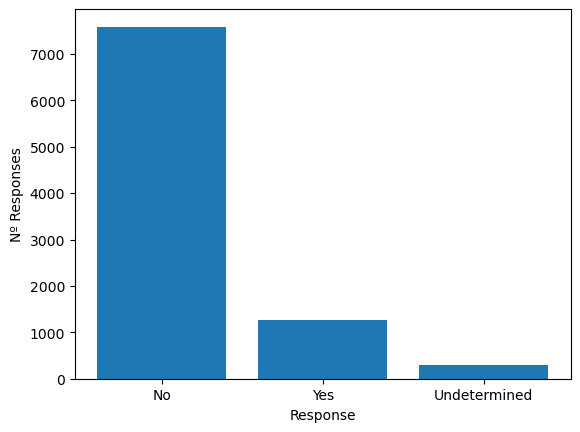

In [46]:
fig, ax = plt.subplots()
ax.bar(x = df['response'].value_counts().index, height = df['response'].value_counts().values)
ax.set_xlabel("Response")
ax.set_ylabel("Nº Responses")
plt.show()

Show a plot of the response rate by the sales channel.

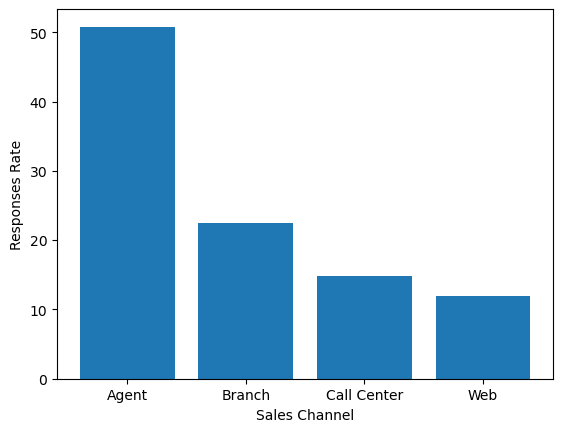

In [53]:
fig, ax = plt.subplots()
ax.bar(x = df3['sales_channel'].values, height = df3['rate'].values)
ax.set_xlabel("Sales Channel")
ax.set_ylabel("Responses Rate")
plt.show()

#note: df3 is filtered by Yes responses, find below without filtering

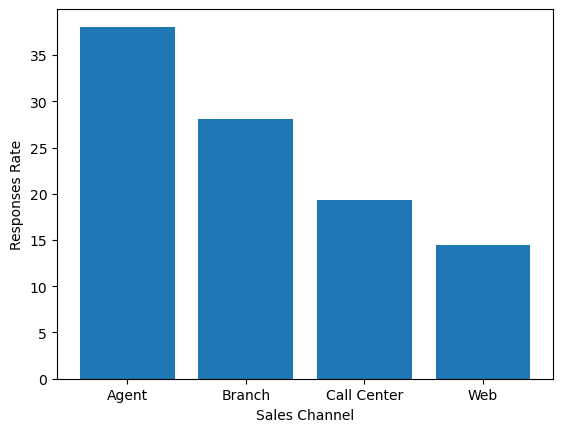

In [108]:
df4 = df.groupby('sales_channel')['response'].count().reset_index()
df4['rate'] = (df4['response'] / df4['response'].sum())*100

fig, ax = plt.subplots()
ax.bar(x = df4['sales_channel'].values, height = df4['rate'].values)
ax.set_xlabel("Sales Channel")
ax.set_ylabel("Responses Rate")
plt.show()

# on the other hand, here we have all values, Yes, No and Undetermined

Show a plot of the response rate by the total claim amount.

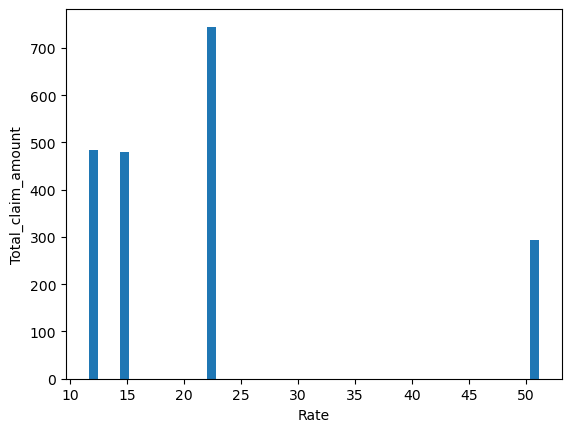

In [99]:
df3['total_claim_amount'] = df['total_claim_amount'].copy()

fig, ax = plt.subplots()
ax.bar(x = df3['rate'].values, height = df3['total_claim_amount'].values)
ax.set_xlabel("Rate")
ax.set_ylabel("Total_claim_amount")
plt.show()

#note: df3 is filtered by Yes responses, find below without filtering

Text(0, 0.5, 'Total claim amount')

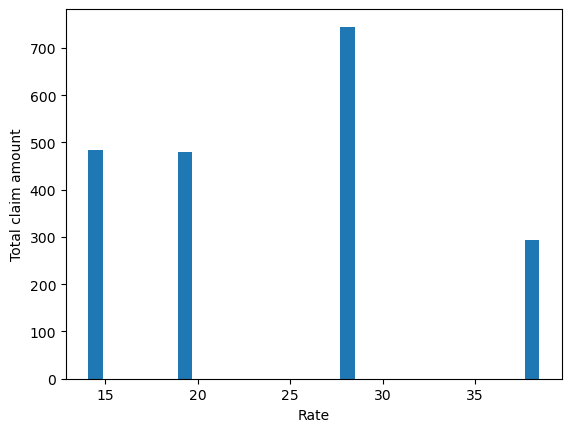

In [114]:
df4['total_claim_amount'] = df['total_claim_amount'].copy()

fig, ax = plt.subplots()
ax.bar(x = df4['rate'].values, height = df4['total_claim_amount'].values)
ax.set_xlabel("Rate")
ax.set_ylabel('Total claim amount')

In [ ]:
# Here we can see a big change, that comparing to the previous one we see that big majority of the "No" and "Undetermined"  responses rate are above 700 of the total claim amount

Show a plot of the response rate by income.

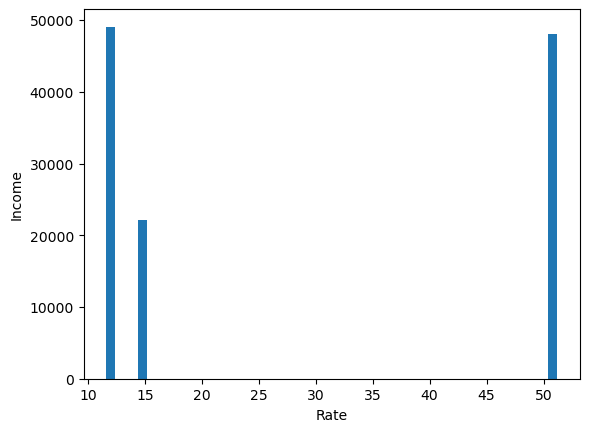

In [103]:
df3['income'] = df['income'].copy()

fig, ax = plt.subplots()
ax.bar(x = df3['rate'].values, height = df3['income'].values)
ax.set_xlabel("Rate")
ax.set_ylabel("Income")
plt.show()

#note: df3 is filtered by Yes responses, find below without filtering

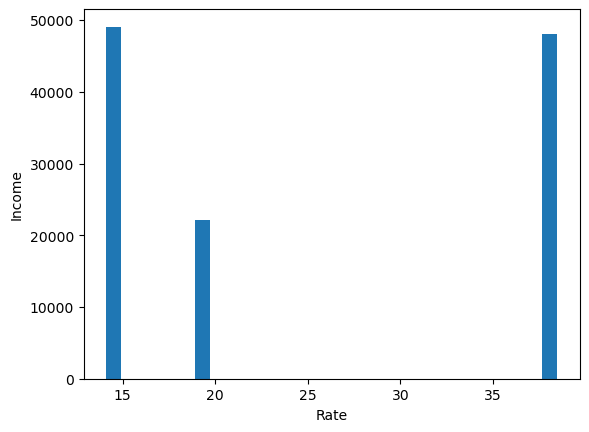

In [113]:
df4['income'] = df['income'].copy()

fig, ax = plt.subplots()
ax.bar(x = df4['rate'].values, height = df4['income'].values)
ax.set_xlabel("Rate")
ax.set_ylabel("Income")
plt.show()